In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [34]:
df = pd.read_csv('dataset/user_overview_data.csv')

In [35]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes),Total Uploads,Total Downloads,Total UL and DL
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,244912.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,36749741.0,4.806241e+08,345629377.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,244912.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,53800391.0,1.180289e+09,707185356.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,244912.0,2.082008e+14,3.373042e+10,3.528151e+13,D42335A,...,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,27883638.0,6.904999e+08,307690973.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,244912.0,2.082014e+14,3.373042e+10,3.535661e+13,T21824A,...,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,43324218.0,1.595068e+09,889352748.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,244912.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,38542814.0,1.119848e+09,607681403.0


In [38]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [40]:
# number of data rows and columns
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 59 columns


In [42]:
df.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [44]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 59 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

# Preprocess & Aggregate Engagement Metrics per MSISDN
**We calculate:**

**Session Frequency = count of rows per MSISDN**

**Total Duration = sum of Dur (ms)**

**Total Traffic = sum of Total UL (Bytes) + Total DL (Bytes)**


In [46]:
agg_df = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Bearer Id': 'count'  
}).reset_index()

agg_df.rename(columns={
    'Dur. (ms)': 'total_duration',
    'Total DL (Bytes)': 'total_download',
    'Total UL (Bytes)': 'total_upload',
    'Bearer Id': 'session_count'
}, inplace=True)

# Total traffic
agg_df['total_traffic'] = agg_df['total_download'] + agg_df['total_upload']
agg_df.head()


,MSISDN/Number,total_duration,total_download,total_upload,session_count,total_traffic
0,3.360416e+10,157869435.0,7.432310e+11,6.660241e+10,1631,8.098334e+11
1,3.360417e+10,58922.0,5.292440e+08,4.307210e+07,1,5.723161e+08
2,3.360417e+10,212989.0,9.034510e+08,6.479081e+07,2,9.682418e+08
3,3.360418e+10,127367.0,7.154997e+08,3.793038e+07,1,7.534301e+08
4,3.360418e+10,45126.0,2.278016e+08,4.454165e+07,1,2.723432e+08


# Top 10 Users per Metric

In [48]:
print("Top 10 users by session count:")
print(agg_df.nlargest(10, 'session_count'))

print("\nTop 10 users by total duration:")
print(agg_df.nlargest(10, 'total_duration'))

print("\nTop 10 users by total traffic:")
print(agg_df.nlargest(10, 'total_traffic'))


Top 10 users by session count:
       MSISDN/Number  total_duration  total_download  total_upload  \
89091   3.373042e+10    2.364114e+09    1.053428e+13  9.586824e+11   
0       3.360416e+10    1.578694e+08    7.432310e+11  6.660241e+10   
52434   3.366371e+10    6.973136e+07    4.875441e+11  4.442001e+10   
12316   3.362632e+10    4.004601e+06    7.301517e+09  6.696507e+08   
5227    3.361489e+10    3.897579e+06    8.156743e+09  6.894830e+08   
11970   3.362578e+10    4.135260e+06    7.770043e+09  7.295774e+08   
35842   3.365973e+10    3.490608e+06    7.081602e+09  6.242603e+08   
75153   3.367588e+10    3.330261e+06    7.309542e+09  5.815688e+08   
63908   3.366716e+10    3.111859e+06    5.052068e+09  5.663264e+08   
69      3.360452e+10    2.778163e+06    5.096079e+09  3.917759e+08   

       session_count  total_traffic  
89091          23317   1.149296e+13  
0               1631   8.098334e+11  
52434           1067   5.319641e+11  
12316             18   7.971167e+09  
5227    

C:\Users\gurpr\AppData\Local\Temp\ipykernel_15808\2685296941.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='session_count', y='MSISDN/Number', data=top_sessions, ax=axes[0], palette='Blues_d')
C:\Users\gurpr\AppData\Local\Temp\ipykernel_15808\2685296941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_duration', y='MSISDN/Number', data=top_duration, ax=axes[1], palette='Greens_d')
C:\Users\gurpr\AppData\Local\Temp\ipykernel_15808\2685296941.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_traffic', y='MSISD

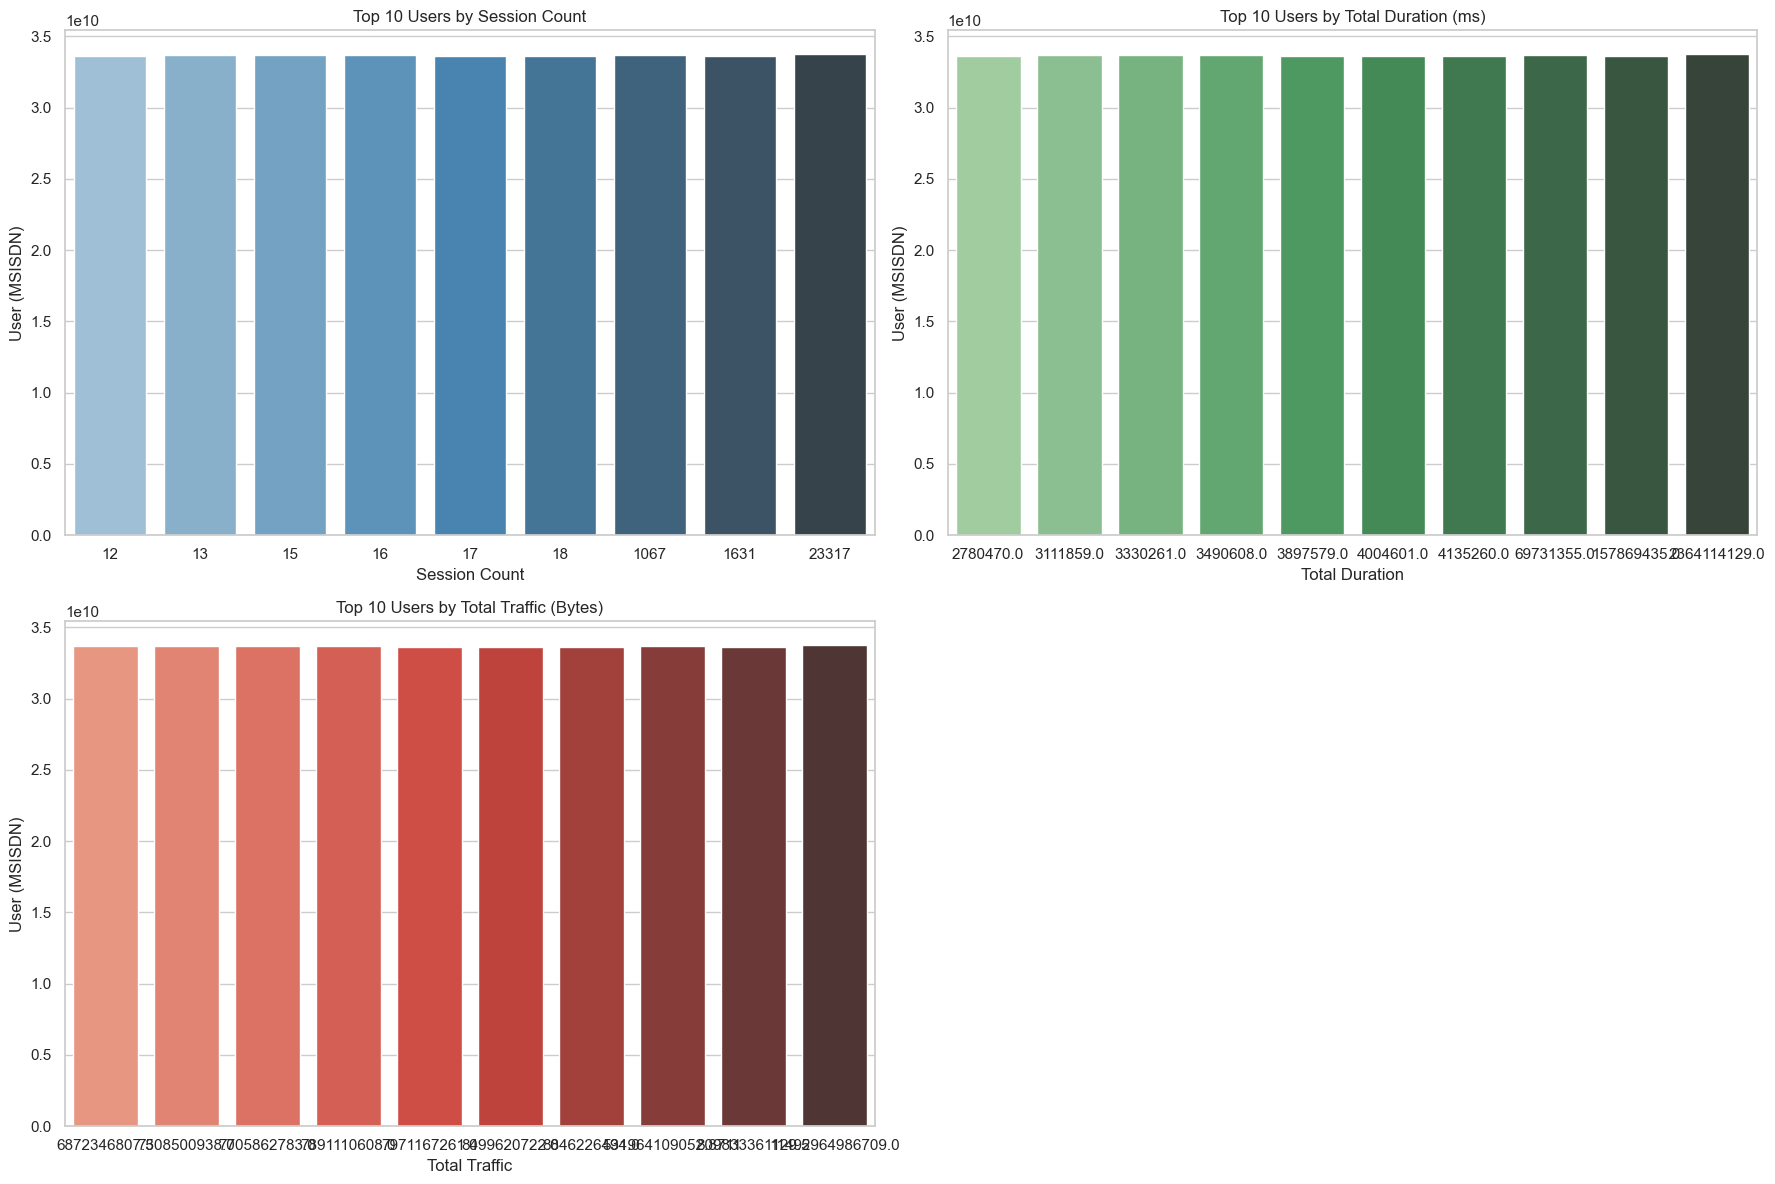

In [102]:
#  plot style
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes = axes.flatten()

# Top 10 users by session count
top_sessions = agg_df.nlargest(10, 'session_count')
sns.barplot(x='session_count', y='MSISDN/Number', data=top_sessions, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Users by Session Count')
axes[0].set_xlabel('Session Count')
axes[0].set_ylabel('User (MSISDN)')

# Top 10 users by total duration
top_duration = agg_df.nlargest(10, 'total_duration')
sns.barplot(x='total_duration', y='MSISDN/Number', data=top_duration, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Users by Total Duration (ms)')
axes[1].set_xlabel('Total Duration')
axes[1].set_ylabel('User (MSISDN)')

# Top 10 users by total traffic
top_traffic = agg_df.nlargest(10, 'total_traffic')
sns.barplot(x='total_traffic', y='MSISDN/Number', data=top_traffic, ax=axes[2], palette='Reds_d')
axes[2].set_title('Top 10 Users by Total Traffic (Bytes)')
axes[2].set_xlabel('Total Traffic')
axes[2].set_ylabel('User (MSISDN)')


fig.delaxes(axes[3])

plt.tight_layout()
plt.show()


#  Normalize Engagement Metrics

In [84]:
scaler = MinMaxScaler()
engagement_features = agg_df[['session_count', 'total_duration', 'total_traffic']]
normalized = scaler.fit_transform(engagement_features)

normalized_df = pd.DataFrame(normalized, columns=['session_count_norm', 'total_duration_norm', 'total_traffic_norm'])

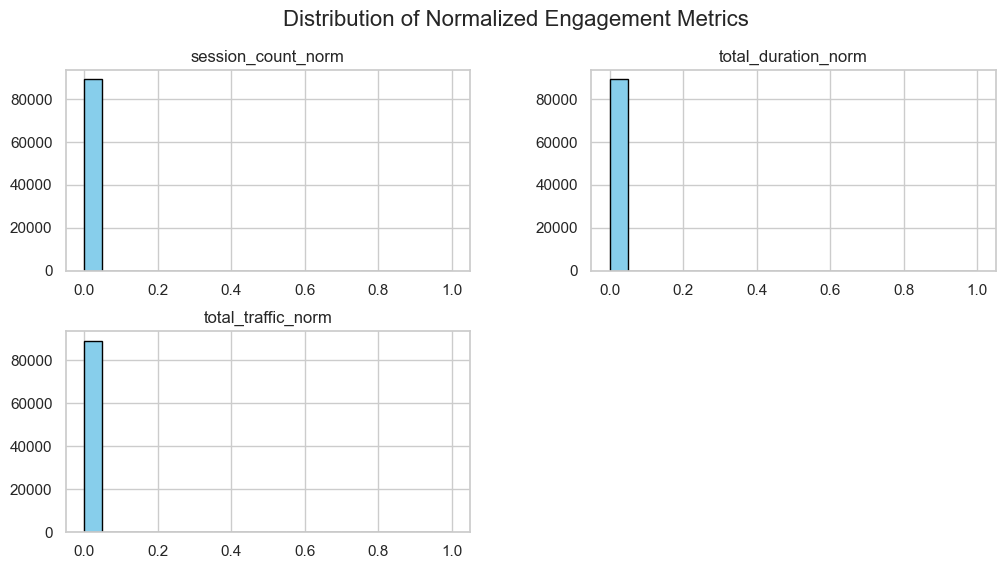

In [86]:
normalized_df.hist(figsize=(12, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Normalized Engagement Metrics", fontsize=16)
plt.show()


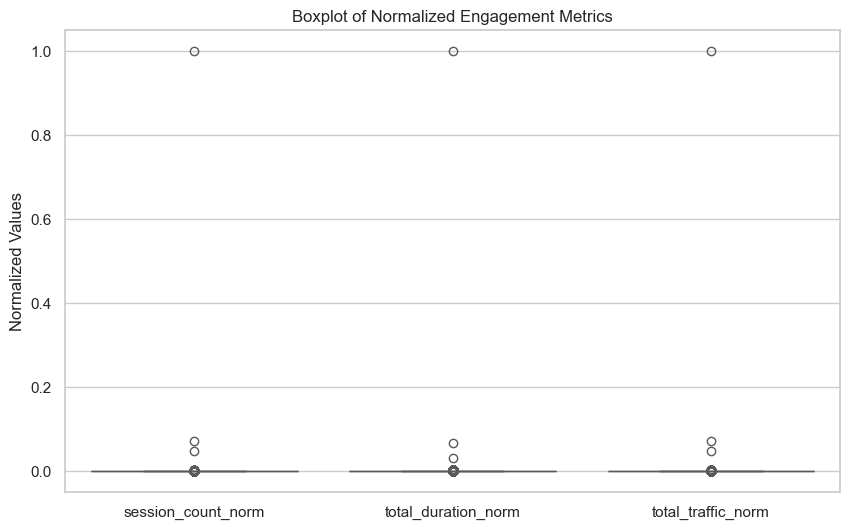

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_df, palette="Set2")
plt.title("Boxplot of Normalized Engagement Metrics")
plt.ylabel("Normalized Values")
plt.show()


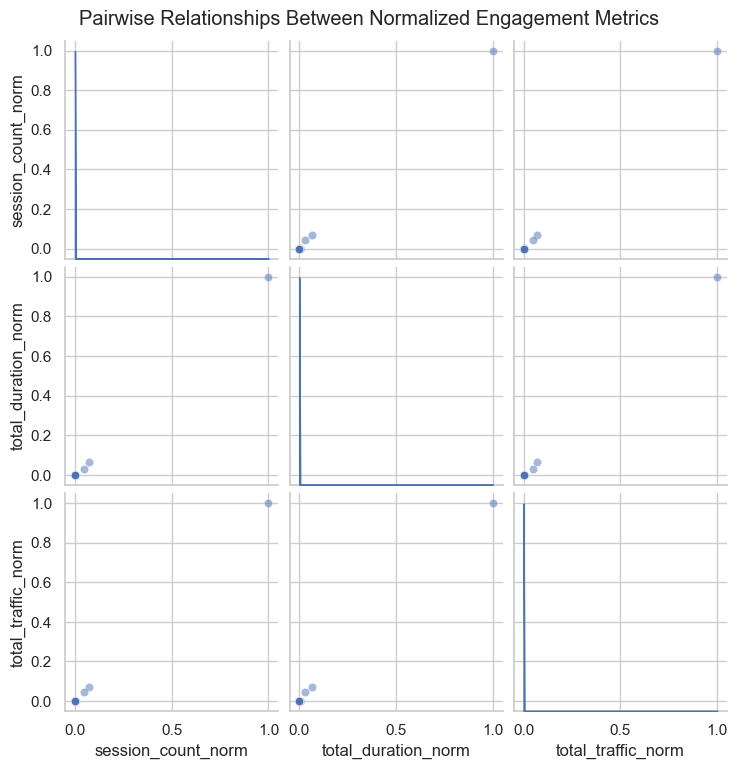

In [96]:
sns.pairplot(normalized_df, diag_kind='kde', plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Relationships Between Normalized Engagement Metrics", y=1.02)
plt.show()


 # Apply K-Means Clustering (k=3)

In [88]:
kmeans = KMeans(n_clusters=3, random_state=42)
agg_normalized['cluster'] = kmeans.fit_predict(normalized_df)

# Merge with original metrics
full_clustered_df = pd.concat([agg_df, agg_normalized[['cluster']]], axis=1)


# Cluster Summary Statistics

In [90]:
cluster_stats = full_clustered_df.groupby('cluster')[['session_count', 'total_duration', 'total_traffic']].agg(['min', 'max', 'mean', 'sum'])
print(cluster_stats)


        session_count                              total_duration  \
                  min    max          mean     sum            min   
cluster                                                             
0                   1     18      1.391709  123986   7.146000e+03   
1               23317  23317  23317.000000   23317   2.364114e+09   
2                1067   1631   1349.000000    2698   6.973136e+07   

                                                  total_traffic                \
                  max          mean           sum           min           max   
cluster                                                                         
0        4.135260e+06  1.385602e+05  1.234419e+10  3.324901e+07  8.846226e+09   
1        2.364114e+09  2.364114e+09  2.364114e+09  1.149296e+13  1.149296e+13   
2        1.578694e+08  1.138004e+08  2.276008e+08  5.319641e+11  8.098334e+11   

                                     
                 mean           sum  
cluster               

# Visualize Clusters

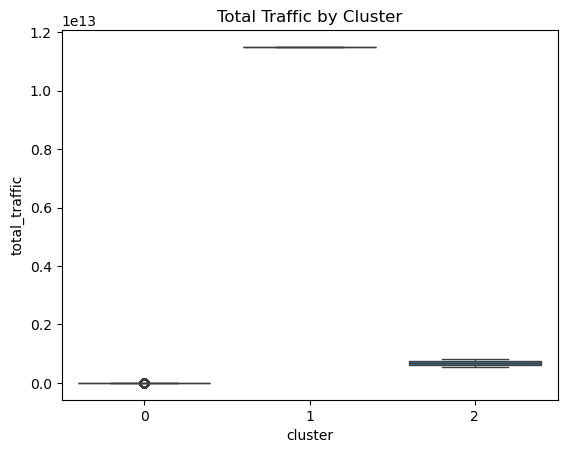

In [64]:
sns.boxplot(x='cluster', y='total_traffic', data=full_clustered_df)
plt.title('Total Traffic by Cluster')
plt.show()


# Elbow Method for Optimal K

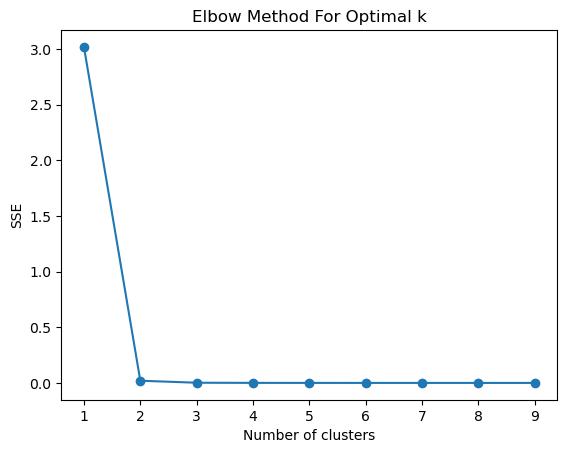

In [68]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(normalized_df)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


# Traffic Per Application & Top Users

In [76]:
# traffic per application
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Total DL (Bytes)',
        'Netflix DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)']

app_traffic = df.groupby('MSISDN/Number')[apps].sum().reset_index()

top_users_per_app = {}
for app in apps:
    top_users_per_app[app] = app_traffic[['MSISDN/Number', app]].nlargest(10, app)

top_users_per_app['Total DL (Bytes)']


,MSISDN/Number,Total DL (Bytes)
89091,3.373042e+10,1.053428e+13
0,3.360416e+10,7.432310e+11
52434,3.366371e+10,4.875441e+11
5227,3.361489e+10,8.156743e+09
11970,3.362578e+10,7.770043e+09
75153,3.367588e+10,7.309542e+09
12316,3.362632e+10,7.301517e+09
35842,3.365973e+10,7.081602e+09
61818,3.366646e+10,6.903440e+09
56031,3.366471e+10,6.400774e+09


# Top 3 Most Used Apps Visualization

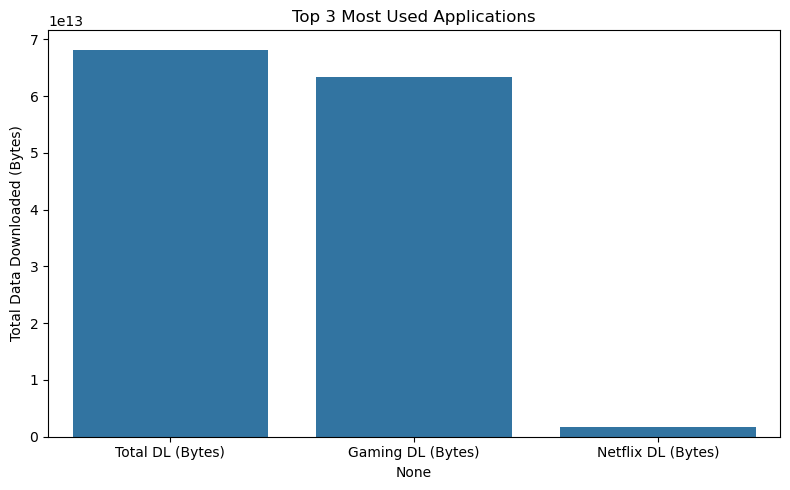

In [78]:
app_totals = df[apps].sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(8, 5))
sns.barplot(x=app_totals.index, y=app_totals.values)
plt.title("Top 3 Most Used Applications")
plt.ylabel("Total Data Downloaded (Bytes)")
plt.tight_layout()
plt.show()


In [98]:
df.to_csv('dataset/user_engagement.csv')